## Aim of this class is to get familiar with scaling relations in elliptical galaxies

do **NOT** copy the catalogues (they'll eat up your quota), use them directly via:

In [1]:
# szuflada_path = '/home/SZUFLADA/PN/extragalactic_classes/gama_dr4/'
# merged_file = szuflada_path + 'merged_cats.csv'

In [2]:
szuflada_path = '/media/olehryz/Elements/databases/GAMA_DR4/fits/'

magphys_file = szuflada_path + 'MagPhysv06.fits'
sersic_file = szuflada_path + 'SersicCatSDSSv09.fits'
veldisp_file = szuflada_path + 'VelocityDispersionsv02.fits'

some imports for the class:

In [3]:
import pandas as pd
pd.options.mode.copy_on_write = True

from astropy.io import fits
from astropy.table import Table

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import astropy.units as u

In [7]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=.3)

### TASK 0. Combine the files into the improvised "merged.csv"

In [8]:
with fits.open(sersic_file) as hdul:
   data = hdul[1].data

data

table_sersic = Table(data)

sersic = table_sersic.to_pandas()

In [9]:
with fits.open(magphys_file) as hdul:
   data = hdul[1].data

data

table_magphys = Table(data)

magphys = table_magphys.to_pandas()

In [10]:
with fits.open(veldisp_file) as hdul:
   data = hdul[1].data

data

table_veldisp = Table(data)

veldisp = table_veldisp.to_pandas()

In [11]:
df = magphys.merge(sersic, how='inner', left_on='CATAID', right_on='CATAID')

df = df.merge(veldisp, how='inner', left_on='CATAID', right_on='CATAID')

df

,CATAID,Z_x,f_mu_SFH_best_fit,f_mu_SFH_percentile2_5,f_mu_SFH_percentile16,f_mu_SFH_percentile50,f_mu_SFH_percentile84,f_mu_SFH_percentile97_5,f_mu_IR_best_fit,f_mu_IR_percentile2_5,...,SNR_REST,SNR_OBSR,CHI2,V_STAR,VERR_STAR,SIG_STAR,SIGERR_STAR,SIG_STARCORR,SIGERR_STARCORR,PIPEHASH
0,6802,0.0505,0.207,0.207,0.367,0.449,0.485,0.878,0.088,0.139,...,2.45,3.13,0.490000,20.905844,61.403019,53.368874,131.620972,53.459721,131.620972,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
1,6803,0.1603,0.896,0.743,0.856,0.917,0.967,0.993,0.793,0.687,...,6.35,5.82,0.610000,-7.796788,23.422071,143.846695,28.969646,144.091553,28.969646,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
2,6808,0.2294,0.783,0.393,0.514,0.772,0.906,0.974,0.688,0.324,...,6.03,4.13,0.550000,-15.218562,47.650871,232.559280,48.479618,232.955154,48.479618,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
3,6814,0.4080,0.906,0.578,0.703,0.857,0.933,0.957,0.895,0.519,...,6.26,3.29,0.980000,65.360954,24.911945,321.614594,36.680138,321.614594,36.680138,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
4,6821,0.0038,0.101,0.028,0.101,0.101,0.166,0.218,0.163,0.062,...,11.20,14.21,73.330002,-159.123611,95.570648,35.228088,203.860794,35.288055,203.860794,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92798,4207334,0.4170,0.932,0.457,0.736,0.872,0.953,0.985,0.895,0.424,...,6.06,3.04,1.070000,81.253731,18.008802,232.539444,28.509470,232.539444,28.509470,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
92799,4207769,0.3848,0.675,0.235,0.434,0.670,0.871,0.969,0.558,0.195,...,8.88,2.89,0.490000,-2.969856,29.077179,212.918182,31.695238,213.280624,31.695238,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
92800,4210864,0.3194,0.700,0.261,0.476,0.599,0.696,0.787,0.552,0.236,...,5.08,1.94,0.610000,-1130.670898,133.337463,961.924561,120.117111,963.562012,120.117111,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
92801,4216653,0.3481,0.634,0.255,0.553,0.743,0.906,0.982,0.773,0.230,...,6.22,2.45,0.690000,-20.074898,72.736771,452.961487,66.429253,453.732544,66.429253,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb


### TASK 1: explore the Faber-Jackson law / fundamental plane based on GAMA galaxies

#### Try to replicate right panel of attached figure (fundamental plane, mag vs Re)

![image](05b_1.png)

Some questions/hints to answer first:
- does GAMA provide luminosity measurements? if not, what can be used as a proxy?
- effective radii are available in SersicPhotometry, though not in kpc ;)

In [12]:
# df = pd.read_csv(merged_file)

df

,CATAID,Z_x,f_mu_SFH_best_fit,f_mu_SFH_percentile2_5,f_mu_SFH_percentile16,f_mu_SFH_percentile50,f_mu_SFH_percentile84,f_mu_SFH_percentile97_5,f_mu_IR_best_fit,f_mu_IR_percentile2_5,...,SNR_REST,SNR_OBSR,CHI2,V_STAR,VERR_STAR,SIG_STAR,SIGERR_STAR,SIG_STARCORR,SIGERR_STARCORR,PIPEHASH
0,6802,0.0505,0.207,0.207,0.367,0.449,0.485,0.878,0.088,0.139,...,2.45,3.13,0.490000,20.905844,61.403019,53.368874,131.620972,53.459721,131.620972,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
1,6803,0.1603,0.896,0.743,0.856,0.917,0.967,0.993,0.793,0.687,...,6.35,5.82,0.610000,-7.796788,23.422071,143.846695,28.969646,144.091553,28.969646,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
2,6808,0.2294,0.783,0.393,0.514,0.772,0.906,0.974,0.688,0.324,...,6.03,4.13,0.550000,-15.218562,47.650871,232.559280,48.479618,232.955154,48.479618,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
3,6814,0.4080,0.906,0.578,0.703,0.857,0.933,0.957,0.895,0.519,...,6.26,3.29,0.980000,65.360954,24.911945,321.614594,36.680138,321.614594,36.680138,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
4,6821,0.0038,0.101,0.028,0.101,0.101,0.166,0.218,0.163,0.062,...,11.20,14.21,73.330002,-159.123611,95.570648,35.228088,203.860794,35.288055,203.860794,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92798,4207334,0.4170,0.932,0.457,0.736,0.872,0.953,0.985,0.895,0.424,...,6.06,3.04,1.070000,81.253731,18.008802,232.539444,28.509470,232.539444,28.509470,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
92799,4207769,0.3848,0.675,0.235,0.434,0.670,0.871,0.969,0.558,0.195,...,8.88,2.89,0.490000,-2.969856,29.077179,212.918182,31.695238,213.280624,31.695238,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
92800,4210864,0.3194,0.700,0.261,0.476,0.599,0.696,0.787,0.552,0.236,...,5.08,1.94,0.610000,-1130.670898,133.337463,961.924561,120.117111,963.562012,120.117111,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb
92801,4216653,0.3481,0.634,0.255,0.553,0.743,0.906,0.982,0.773,0.230,...,6.22,2.45,0.690000,-20.074898,72.736771,452.961487,66.429253,453.732544,66.429253,7cfbd57ccbffdc47d9ffbf27fe4b1250c95bf0fb


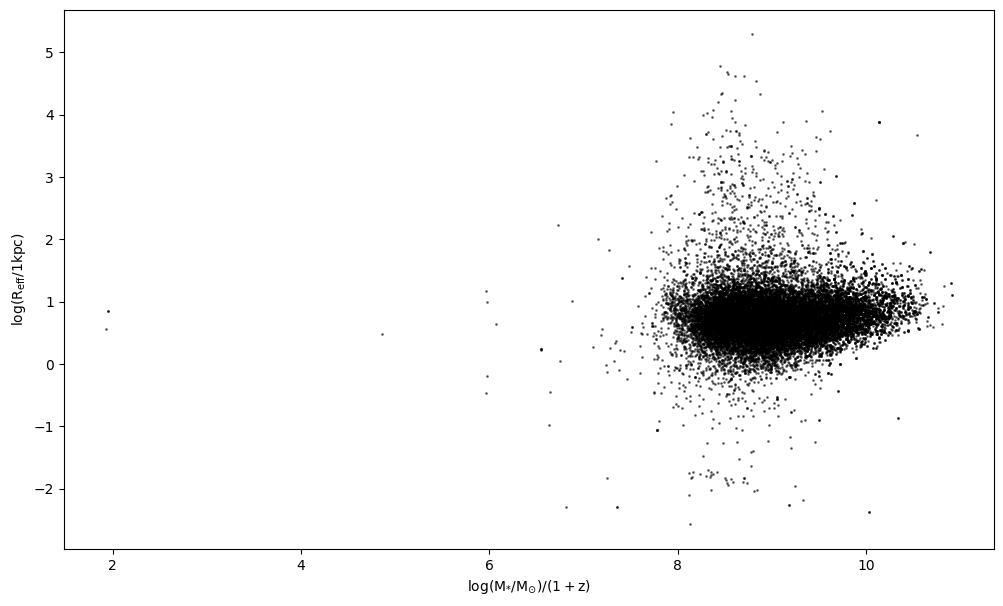

In [13]:
Z = df['Z_x'].values
d_A = cosmo.angular_diameter_distance(Z)
theta_rad = (df['GALRE_r'].values * u.arcsec).to(u.rad).value
df['reff_kpc'] = d_A.to(u.kpc).value * theta_rad

early = df[df['GALINDEX_r'] > 4.0]

fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(early['mass_stellar_percentile50']/(early['Z_x'] + 1), np.log10(early['reff_kpc']), color='k', s=1, alpha=0.5)
ax.set_xlabel(r'$\rm \log(M_{*}/M_{\odot}) / (1 + z)$')
ax.set_ylabel(r'$\rm \log(R_{eff}/1 kpc)$')
# ax.set_yscale('log')

plt.show()

#### Try to replicate the attached figure (Faber-Jackson law, both panels)

![image](05b_2.png)

Some questions/hints to answer first:
- velocity dispersion is available in ``VelocityDispersionsv02.fits`` in SZUFLADA

In [14]:
from astropy.table import Table

# vel_file = '/home/SZUFLADA/PN/extragalactic_classes/gama_dr4/VelocityDispersionsv02.fits'
# vel_table = Table.read(vel_file)
# vel_df = vel_table.to_pandas()

# vel_df

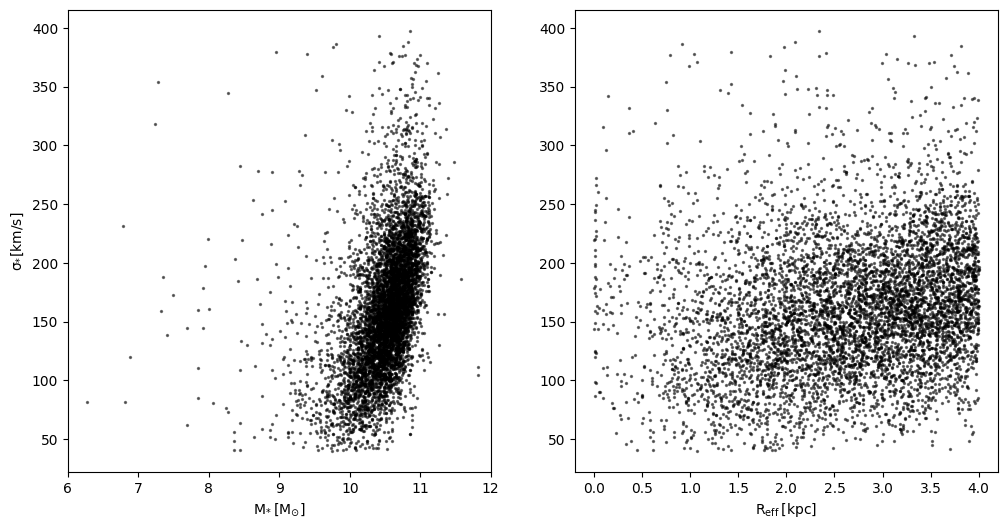

In [15]:
# merged = df.merge(vel_df, left_on='magphys_CATAID', right_on='CATAID')

early = df['GALINDEX_r'] > 4
mask = (df['reff_kpc'] <= 4) & (df['SIG_STARCORR'] <= 400) & (df['SIG_STARCORR']  > 40)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(
    df.loc[early & mask, 'mass_stellar_percentile50'],
    df.loc[early & mask, 'SIG_STARCORR'],
    s=2,
    alpha=0.5,
    color='black'
)

ax[1].scatter(
    df.loc[early & mask, 'reff_kpc'],
    df.loc[early & mask, 'SIG_STARCORR'],
    s=2,
    alpha=0.5,
    color='black'
)

ax[1].set_xlabel(r'$\rm R_{eff} \: [kpc]$')
ax[0].set_xlabel(r'$\rm M_{*} \: [M_{\odot}]$')
ax[0].set_ylabel(r'$\rm \sigma_{*} [km/s]$')

ax[0].set_xlim(6, 12)

plt.show()

In [16]:
# merged = df.merge(vel_df, left_on='magphys_CATAID', right_on='CATAID')

# early = merged['sersic_GALINDEX_r'] > 4
# mask = (merged['rad_kpc'] <= 4) & (merged['SIG_STARCORR'] <= 400) & (merged['SIG_STARCORR']  > 40)

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(
#     merged.loc[early & mask, 'rad_kpc'],
#     merged.loc[early & mask, 'SIG_STARCORR'],
#     s=2,
#     alpha=0.5
# )

# ax.set_xlabel(r'$\rm R_{eff} \: [kpc]$')
# ax.set_ylabel(r'$\rm \sigma_{*} [km/s]$')

# plt.show()